In [ ]:
import torch

# Define the dimensions for input, hidden layers, and output
x_dim, h_dim_1, h_dim_2, y_dim = 3, 4, 4, 1

# Define three linear layers
linear_1 = torch.nn.Linear(x_dim, h_dim_1)  # First linear layer: input to first hidden layer (R^3 -> R^4)
linear_2 = torch.nn.Linear(h_dim_1, h_dim_2)  # Second linear layer: first hidden to second hidden layer (R^4 -> R^4)
linear_3 = torch.nn.Linear(h_dim_2, y_dim)  # Third linear layer: second hidden to output layer (R^4 -> R^1)

# The first dimension of x is usually the batch size.
x = torch.randn([1, x_dim])  # Generate a random input vector of shape [1, 3]

# Forward pass through the network:
h1 = linear_1(x)  # Input through the first linear layer, result is shape [1, 4]
h2 = linear_2(h1)  # Output of first layer through the second linear layer, result is shape [1, 4]
y = linear_3(h2)  # Output of second layer through the third (output) linear layer, result is shape [1, 1]
print("Input:", x)
print("Output:", y)

Input: tensor([[0.6568, 1.9173, 0.3077]])
Output: tensor([[-0.1179]], grad_fn=<AddmmBackward0>)


# Step:
Import PyTorch: You start by importing PyTorch, which is a powerful library for deep learning that provides a wide range of tools and modules to construct and train neural networks.

Define Dimensions: You define the dimensions of the input layer (x_dim), two hidden layers (h_dim_1 and h_dim_2), and the output layer (y_dim). This sets up the size of the network.

Construct Linear Layers: You create three linear (fully connected) layers using torch.nn.Linear. Each layer is defined to take a specific size of input and transform it to a specific size of output, matching the dimensions you've previously defined.

Create an Input Tensor: You generate a random input tensor x with a shape of [1, x_dim], which simulates a single instance (or batch of size 1) with the input dimensionality you specified. This tensor represents the input data that you feed into the network.

Forward Pass: You sequentially pass the input x through the three linear layers (linear_1, linear_2, linear_3) using function calls. At each step, the output of the previous layer is used as the input for the next layer. The process transforms the input from the original space (R^3) to the final output space (R^1).

h1 = linear_1(x): Passes the input x through the first linear layer, producing the first hidden layer's activation h1.
h2 = linear_2(h1): Passes h1 through the second linear layer, producing the second hidden layer's activation h2.
y = linear_3(h2): Finally, h2 is passed through the third linear layer to produce the output y.
This demonstrates a basic forward pass through a neural network without any non-linear activation functions. In practice, to enable the network to learn complex patterns and non-linear relationships, activation functions (like ReLU, sigmoid, etc.) are applied to the outputs of hidden layers before passing them to subsequent layers.

# Softmax Layer

In [ ]:
# Define a tensor of values
x = torch.tensor([3.0, 1.0, -3.0])  # It's recommended to directly define it as float

# Apply the Softmax function across dimension 0 (since x has only one dimension)
softmax = torch.nn.Softmax(dim=0)
softmax_values = softmax(x)

# Print the softmax values
print(softmax_values)  # This will print the probabilities

# Verifying that the sum of softmax values equals 1
sum_of_softmax = torch.sum(softmax_values)
print(sum_of_softmax)  # This will print a tensor with the value 1.0


tensor([0.8789, 0.1189, 0.0022])
tensor(1.)


# Let's break down the changes and important points:

Tensor Data Type: I've initialized the tensor x with floating point values directly. PyTorch's operations, including Softmax, typically require inputs to be of a floating point type (torch.float32 or torch.float64).

Softmax Module: The torch.nn.Softmax class is used to create a Softmax module. When instantiating this module, you must specify the dimension dim over which the softmax operation is applied. Since your tensor x is 1-dimensional, using dim=0 applies softmax across this dimension.

 Applying Softmax: The softmax module is then applied to the tensor x, converting its values into probabilities that sum up to 1.

Sum of Softmax Values: Finally, by summing up the softmax values with torch.sum(softmax_values), you verify that the probabilities indeed sum up to 1.0.

# ReLU and Leaky ReLU

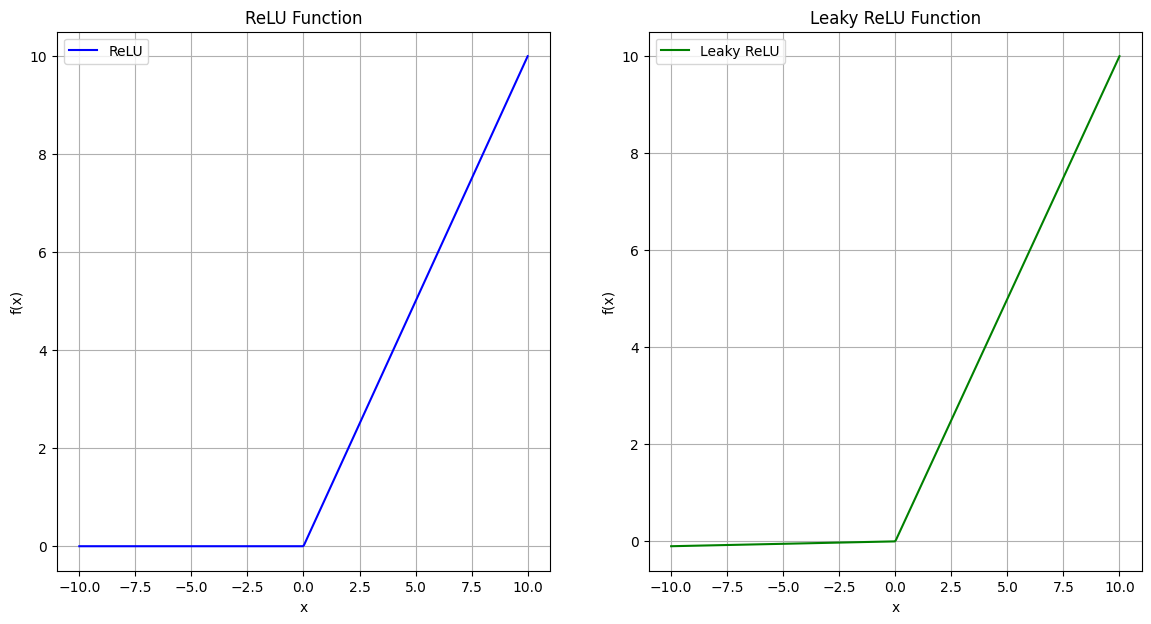

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define the Leaky ReLU activation function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

# Input data
x_values = np.linspace(-10, 10, 400)

# Apply the ReLU function to the input data
relu_values = relu(x_values)

# Apply the Leaky ReLU function to the input data with alpha=0.01
leaky_relu_values = leaky_relu(x_values, alpha=0.01)

# Plot the functions for comparison
plt.figure(figsize=(14, 7))

# ReLU plot
plt.subplot(1, 2, 1)
plt.plot(x_values, relu_values, label='ReLU', color='blue')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()

# Leaky ReLU plot
plt.subplot(1, 2, 2)
plt.plot(x_values, leaky_relu_values, label='Leaky ReLU', color='green')
plt.title('Leaky ReLU Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()

# Show plots
plt.show()


In [ ]:
# Example input array of linear activations from some neural network layer
linear_activations = np.array([-1.5, -0.5, 0, 0.5, 1.5])

# Applying ReLU to the example activations
relu_output = relu(linear_activations)

# Applying Leaky ReLU to the example activations
leaky_relu_output = leaky_relu(linear_activations)

# Show the input activations and the outputs after applying ReLU and Leaky ReLU
example_outputs = {
    "Input Activations": linear_activations,
    "ReLU Output": relu_output,
    "Leaky ReLU Output": leaky_relu_output
}

example_outputs


{'Input Activations': array([-1.5, -0.5,  0. ,  0.5,  1.5]),
 'ReLU Output': array([0. , 0. , 0. , 0.5, 1.5]),
 'Leaky ReLU Output': array([-0.015, -0.005,  0.   ,  0.5  ,  1.5  ])}

#### Exlain: if we were training a network on a dataset where the presence of a feature is indicated by a positive value and the absence by a negative value, using ReLU could completely ignore the features that are absent (since it would set them to zero). However, using Leaky ReLU, the network still gets some information about the absence of features due to the small negative outputs for negative inputs, which could lead to more nuanced learning. This could be particularly helpful when dealing with sparse data or when trying to mitigate the issue of neurons that stop learning because they always output zero (a problem sometimes referred to as "dying ReLU")

# Data Preprocessing

In [ ]:
import torch

# Generate a random tensor with 100 elements from a normal distribution
x = torch.randn([100])

# Calculate and print the mean of the tensor; it's close to 0 due to the distribution, but not exactly 0
print(x.mean().item())  # .item() converts a one-element tensor to a Python scalar

# Calculate and print the variance of the tensor; for a standard normal distribution, this is close to 1
print(x.var().item())  # .item() here again converts the tensor to a scalar

# Standardization
# Subtract the mean from each element and divide by the standard deviation
x_standardized = (x - x.mean()) / x.std()

# After standardization, the mean of the tensor should be 0 and variance should be 1
# This is because standardization transforms the data to have these properties
print(x_standardized.mean().item(), x_standardized.var().item())  # Convert to scalars for display

# Normalization
# Subtract the minimum value from each element and divide by the range (max - min)
x_normalized = (x - x.min()) / (x.max() - x.min())

# After normalization, the minimum value in the tensor should be 0 and the maximum should be 1
# This scales the data to be within this range, which can be useful for certain models and comparisons
print(x_normalized.min().item(), x_normalized.max().item())  # Convert to scalars for display


0.21332895755767822
0.8949701189994812
1.668930060816365e-08 1.0
0.0 1.0


# Training NNs for Classification

In [ ]:
import torch
from torch.nn.functional import cross_entropy

# Example logits output from a neural network's final layer for a 4-class classification problem
# These are raw scores (not probabilities)
logits = torch.tensor([[0.8, 0.1, 0.06, 0.04]])

# Correct class index for this example (suppose the correct class is 0)
target = torch.tensor([0])

# Calculate cross-entropy loss
loss = cross_entropy(logits, target)

print(loss.item())


0.8925576210021973


In [ ]:
import torch
from torch.nn.functional import cross_entropy
y = torch.tensor([0.8, 0.1, 0.06, 0.04])

print(cross_entropy(y, torch.tensor(0)))
print(cross_entropy(y, torch.tensor(1)))

tensor(0.8926)
tensor(1.5926)


# Barebones PyTorch Backpropagation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define our dataset, the XOR problem
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.long)  # Use long for CrossEntropyLoss

# Define a simple neural network with one hidden layer
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        # Define layers
        self.hidden = nn.Linear(2, 2)  # First layer with 2 inputs and 2 neurons
        self.out = nn.Linear(2, 2)     # Output layer with 2 inputs and 2 outputs

    def forward(self, x):
        # Forward pass through the network
        x = torch.sigmoid(self.hidden(x))  # Activation function for hidden layer
        x = self.out(x)  # Output layer does not need activation for CrossEntropyLoss
        return x

# Instantiate the network, loss function, and optimizer
network = XORNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.1)

# Training loop
epochs = 50
for epoch in range(epochs):
    for x, y in zip(X, Y):
        optimizer.zero_grad()    # Reset gradients
        y_pred = network(x)      # Forward propagate x
        loss = loss_fn(y_pred.unsqueeze(0), y.unsqueeze(0))  # Evaluate loss, adjust tensor dimensions
        loss.backward()          # Backpropagate the error
        optimizer.step()         # Update weights with optimizer

# Final loss after training
print(f"Final loss: {loss.item()}")


Final loss: 0.7480970621109009


In [ ]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
Y = torch.tensor([0, 1, 1, 0], dtype=int)
print(list(zip(X,Y)))

[(tensor([0., 0.]), tensor(0)), (tensor([0., 1.]), tensor(1)), (tensor([1., 0.]), tensor(1)), (tensor([1., 1.]), tensor(0))]


# Python Program for a 1-2-1 neural network, trained with BP vs BP + momentum

In [ ]:
import numpy as np  # Import NumPy for numerical computations and matrix operations

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate, momentum=None):
        # Constructor for the neural network. Initializes network architecture and learning parameters.
        self.input_size = input_size  # Number of neurons in input layer
        self.hidden_size = hidden_size  # Number of neurons in hidden layer
        self.output_size = output_size  # Number of neurons in output layer
        self.learning_rate = learning_rate  # Learning rate for weight updates
        self.momentum = momentum  # Momentum factor for velocity updates in training

        # Initialize weights for input-to-hidden and hidden-to-output layers with random values
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))  # Initialize biases for hidden layer to zero
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))  # Initialize biases for output layer to zero

        # Initialize velocity matrices for momentum-based updates, if momentum is specified
        if self.momentum is not None:
            self.velocity_input_hidden = np.zeros((self.input_size, self.hidden_size))
            self.velocity_hidden_output = np.zeros((self.hidden_size, self.output_size))
        else:
            self.velocity_input_hidden = self.velocity_hidden_output = None

    def sigmoid(self, x):
        # Sigmoid activation function: f(x) = 1 / (1 + e^-x)
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivative of the sigmoid function: f'(x) = f(x) * (1 - f(x))
        return x * (1 - x)

    def forward_pass(self, X):
        # Perform a forward pass through the network: input -> hidden -> output
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward_pass(self, X, y, output):
        # Backward pass for error calculation and weight update
        # Calculate error in output
        output_error = y - output
        output_delta = output_error * self.sigmoid_derivative(output)

        # Calculate error in hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases using the calculated deltas
        # If momentum is used, update velocities and apply them to weights and biases
        if self.momentum is not None:
            self.velocity_input_hidden = self.momentum * self.velocity_input_hidden + self.learning_rate * X.T.dot(hidden_delta)
            self.velocity_hidden_output = self.momentum * self.velocity_hidden_output + self.learning_rate * self.hidden_output.T.dot(output_delta)
            self.weights_input_hidden += self.velocity_input_hidden
            self.weights_hidden_output += self.velocity_hidden_output
        else:
            self.weights_input_hidden += self.learning_rate * X.T.dot(hidden_delta)
            self.weights_hidden_output += self.learning_rate * self.hidden_output.T.dot(output_delta)

        # Update biases for both layers
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate

        return output_error ** 2  # Return squared error for monitoring

    def train(self, X, y, epochs=10000):
        # Training loop for the network
        for epoch in range(epochs):
            output = self.forward_pass(X)  # Compute network output
            loss = self.backward_pass(X, y, output)  # Adjust weights based on error
            if epoch % 1000 == 999:
                print(f"Epoch {epoch+1}, Loss: {np.mean(loss)}")  # Print loss every 1000 epochs

# Sample input and output for training
X = np.array([[0], [1]])
y = np.array([[0], [1]])

# Create and train the neural network
nn = NeuralNetwork(input_size=1, hidden_size=2, output_size=1, learning_rate=0.1, momentum=0.9)
nn.train(X, y)  # Train the network with the specified data and parameters


Epoch 1000, Loss: 0.008283837276814018
Epoch 2000, Loss: 0.0025292357578898216
Epoch 3000, Loss: 0.001407009274193796
Epoch 4000, Loss: 0.0009530053358807055
Epoch 5000, Loss: 0.0007119044431169263
Epoch 6000, Loss: 0.0005638900838255108
Epoch 7000, Loss: 0.0004644084386938647
Epoch 8000, Loss: 0.0003932639961462521
Epoch 9000, Loss: 0.00034003020396632284
Epoch 10000, Loss: 0.00029880169643106106


# Learning Rate Scheduling

In [ ]:
optimizer = torch.optim.SGD(network.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(epochs):
    for x, y in zip(X, Y):
        optimizer.zero_grad()  # Reset Gradients
        y_pred = network(x)
        loss = criterion(y_pred, y)
        loss.backward()  # Backpropagate, calculate gradients
        optimizer.step()  # Update Weights with LR
    scheduler.step()  # Reduce LR for each epoch, placed correctly here
